# Using random cross-validation for news categorization
## by [Andres Soto](https://www.linkedin.com/in/andres-soto-villaverde-36198a5/)

In my previous blog [News Categorization using Multinomial Naive Bayes](http://nbviewer.jupyter.org/github/andressotov/News-Categorization-MNB/blob/master/News%20Categorization%20MNB.ipynb), I tried to show how to  predict the category (business, entertainment, etc.) of a news article given only its headline using Multinomial Naive Bayes algorithm. 
In that experience, the classification algorithm was trained just with one set of data. Although the training set were selected by random, it is just a sample of the possible results. This time, I would test it with several sets in order to determine how confident the results are.

The dataset used for the project comes from the UCI Machine Learning Repository.

* Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

The dataset contains headlines, URLs, and categories for 422419 news stories collected, which are labelled:

Label  |  Category	| News | Percent
-------|------------|----------|----------
b	|  business	|  <div style="text-align: right"> 115967 </div> | <div style="text-align: right"> 0.2745 </div>
e	| entertainment	|  <div style="text-align: right"> 152469 </div> | <div style="text-align: right"> 0.3609 </div>
m	|  health	|  <div style="text-align: right"> 45639 </div> | <div style="text-align: right"> 0.1080 </div>
t	|  science and technology	|  <div style="text-align: right"> 108344 </div> | <div style="text-align: right"> 0.2564 </div>

<div align="justify">
To judge the quality of some model, you would need to measure how close are the results of your model to the real data you have: which is the error between your estimations and the real data you have. But even more important is how well the model generalizes to new data, because the data we collect is only a sample, it is incomplete and noisy.</div>

<div align="justify">
Inductive learning refers to learning general concepts from specific examples, i.e. to learning the model function from training data. Generalization refers to the ability of the model to learn from the concepts sample and to apply this “knowledge” to specific examples not seen while learning. A good machine learning model should be able to generalize well from the training data to any data from the problem domain.
</div>

<div align="justify">
What happens if your 'real' data is not so accurate? What happens if you want to use your model for predicting new values not included in your previous data? You are adjusting your model results to noisy data considering it good ‘real’ data. Then the noise would probably be translated to your predictions. This phenomenon is called **overfitting**. Overfitting occurs because your model is trained to obtain “good results” with your known data, but the model has not the ability to generalize from it, so it is not prepared to perform well on unseen data. 
</div>

<div align="justify">
Overfitting happens when the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The model is typically trained by maximizing its performance on some set of training data. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. Model efficacy is determined by its ability to perform well on unseen data. Overfitting occurs when a model begins to "memorize" training data rather than "learning" to generalize from a trend.
</div>

In order to avoid overfitting, it is necessary to test the model's ability to generalize by evaluating its performance on a set of data not used for training, which is assumed to approximate the typical unseen data that a model will encounter.
In **cross-validation**, data subsets are held out for use as validating sets; the model is fit to the remaining data (i.e. training set) and the validation set is used for prediction. Averaging the quality of the predictions across the validation sets yields an overall measure of prediction accuracy.

<div align="justify">
The most popular resampling technique is **k-fold cross validation**. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.
However, the evaluation results may significantly depend on which values are used to train the model and which ones are used to test it. Therefore those results could have a high variance depending on the selected sets. To reduce variability, the procedure of cross-validation could be repeated several times, randomly splitting the data in two parts. 
</div>

<div align="justify">
For each such split, the model is fit to the training data, and predictive accuracy is assessed using the validation data. The results are then averaged over the rounds. This method is known as <b>Monte Carlo cross-validation</b> or <b>random cross-validation</b>.
</div>

Another variant of this approach, known as **stratified k-fold** cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds. Stratification seeks to ensure that each fold is representative of all strata of the data and aims to ensure each class is approximately equally represented across each test fold. 

<div align="justify">
In our previous publication already mentioned, we explained the code in detail. For this project, the old code has been organized into three functions, which are explained below
</div>

## Importing data

Function **import_data** imports news data via Pandas (Python Data Analysis Library) and gives us the first 5 rows in the DataFrame. The function **count_data**  tabulates the number of news in the different categories and its percentage.

In [1]:
import News_Categorization_MNB as nc
nc.import_data()
cont = nc.count_data(nc.labels, nc.categories)

   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME      TIMESTAMP  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1394470370698  
1        b  ddUyU0VZz0BRneMi

## Random Cross Validation (RCV)

In order to proceed to the random cross-validation, the data is shuffled before splitting it into two sets: the training set and the testing set. Then, the first set is used to train the algorithm. And the second set is used to test it. This process is repeated N = 10 times, for example. This way the sample for each classification is independently selected. The purpose of those random repetitions is to estimate an approximation of the theoretical mean of the population by averaging the different results.
[Function KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) is used to divide all the samples in k folds, i.e. groups of similar size. One of those folds is left out as test set and used to evaluate whether the discovered relationships hold. The rest of the folds compose the training set used to discover potentially predictive relationships that could model the data behavior. The function gives the possibility to shuffle the data before splitting it into batches (by default, shuffling is not set).

[Function StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) is a variation of k-fold which returns stratified folds. The folds are made by preserving the percentage of samples for each class, i.e. each set contains approximately the same percentage of samples of each target class as the complete set. Once more, shuffling is an option of the function, although it is not set by default.

In order to make the training process easier, scikit-learn provides a [Pipeline class](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that applies a list of transforms (i.e., methods implementing fit and transform operations) to the data, before training the classifier that should appear at the end of the list. 
The first step in the pipeline will be to tokenize and count the number of occurrence of each word that appears into the news'titles using the method [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). After tokenization, the training set is converted in TF-IDF vectors by method [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html). Then, the [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier is created and trained. Then it is used to predict the results for the test set. The accuracy score and the main classification metrics (precision, recall, F1-score, confusion matrix) are printed for each test set.

In [2]:
X = nc.titles
y = nc.categories

In [3]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 
from sklearn import metrics 
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
Ntimes = 10

def k_fold(shuffle=False,stratified=False):
    f1s = [0] * Ntimes
    accus = [0] * Ntimes
    nlabels = len(nc.labels)
    
    if stratified:
        kf = StratifiedKFold(n_splits=Ntimes, shuffle=shuffle)
    else:
        kf = KFold(n_splits=Ntimes, shuffle=shuffle)

    k = 0
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        text_clf = Pipeline([('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                 ('clf', MultinomialNB()),
                                 ])
        text_clf = text_clf.fit(X_train, y_train)
        predicted = text_clf.predict(X_test)

        accus[k] = metrics.accuracy_score(y_test, predicted)


        f1s[k] = metrics.f1_score(y_test, predicted, labels=nc.labels,
                                   average=None)        
        k+=1
    
    return (accus,f1s)

(accus1,f1s1) = k_fold(shuffle=False,stratified=False)
(accus2,f1s2) = k_fold(shuffle=False,stratified=True)
(accus3,f1s3) = k_fold(shuffle=True,stratified=False)
(accus4,f1s4) = k_fold(shuffle=True,stratified=True)

Now, let's compare the accuracy results obtained with the different methods.

<IPython.core.display.Javascript object>


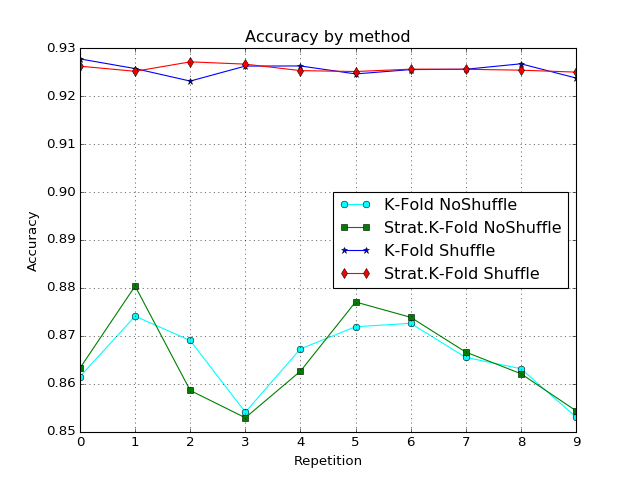

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

x = list(range(len(accus1)))
y0 = accus1
y1 = accus2
y2 = accus3
y3 = accus4

plt.plot(x,y0,color='cyan',marker='o')
plt.plot(x,y1,color='green',marker='s')
plt.plot(x,y2,color='blue',marker='*')
plt.plot(x,y3,color='red',marker='d')
plt.legend(["K-Fold NoShuffle", "Strat.K-Fold NoShuffle", "K-Fold Shuffle", 
            "Strat.K-Fold Shuffle"], loc='best')
plt.title("Accuracy by method")
plt.ylabel("Accuracy")
plt.xlabel("Repetition")
plt.grid(True)
plt.show()

According to the figure above, we can see that results from both methods without shuffling are worse than the other ones. 
Following the confidence interval for the mean accuracy of each method is calculated with the half span range. Confidence interval provides a range of values which is likely to contain the population mean. A confidence interval at a 95% confidence level means that the true population parameter would be bracketed by the interval in approximately 95 % of the cases. However, the interval computed from a particular sample does not necessarily include the true value of the parameter.

In [5]:
import pandas as pd

lista = [nc.conf_interv1("Accuracy ",accus) for accus in [accus1,accus2,accus3,accus4]]
mean,half = zip(*lista)
df = pd.DataFrame([list(mean),list(half)]).transpose()
df.columns = ["mean accuracy","half range"]
df.index = ["K-Fold NoShuffle", "Strat.K-Fold NoShuffle", "K-Fold Shuffle", "Strat.K-Fold Shuffle"]
df

,mean accuracy,half range
K-Fold NoShuffle,0.865262,0.005254
Strat.K-Fold NoShuffle,0.865221,0.006651
K-Fold Shuffle,0.925517,0.000988
Strat.K-Fold Shuffle,0.925702,0.000513


Shuffling gives better results than without using it. By other hand, K-Fold results are better than stratify K-Fold ones.
Let's analyze the results for the F1-score. F1-score can be interpreted as a weighted average of [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). In the following graphics, the best results of F1-score are obtained with category 'e' (entertainment) for all the methods.

<IPython.core.display.Javascript object>


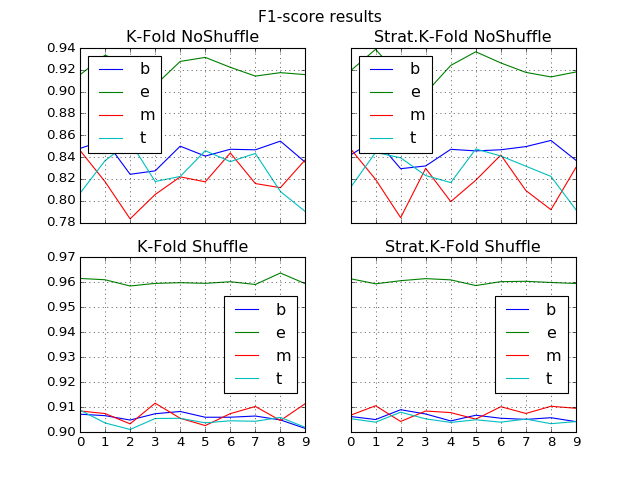

In [6]:
# F1-score
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row')

def multiplot(ax,f1s,tit):
    matf1 = np.matrix(f1s)
    x = list(range(len(f1s)))
    y0 = list(matf1[:, 0].flat)
    y1 = list(matf1[:, 1].flat)
    y2 = list(matf1[:, 2].flat)
    y3 = list(matf1[:, 3].flat)

    fig.suptitle("F1-score results", fontsize=14)

    l1 = ax.plot(x,y0)
    l2 = ax.plot(x,y1)
    l3 = ax.plot(x,y2)
    l4 = ax.plot(x,y3)
    ax.legend(['b', 'e', 'm', 't'], loc='best')
    ax.set_title(tit)
    ax.grid(True)

multiplot(ax1,f1s1, "K-Fold NoShuffle")
multiplot(ax2,f1s2, "Strat.K-Fold NoShuffle")
multiplot(ax3,f1s3, "K-Fold Shuffle")
multiplot(ax4,f1s4, "Strat.K-Fold Shuffle")

plt.show()

Analyzing the mean values of F1-score for each category, we obtain again that shuffling gives better results than without using it, but K-Fold results are close to the stratify K-Fold ones. 

In [35]:
lista = [np.mean(f1s, axis=0) for f1s in [f1s1,f1s2,f1s3,f1s4]]
mat = np.matrix(lista)
meanxcol = mat.mean(0)
mat2 = np.append(mat,meanxcol, axis=0)
meanxrow = mat2.mean(1)
mat3 = np.append(mat2,meanxrow, axis=1)
df = pd.DataFrame(mat3) 
df.columns = ['business', 'entertainment', 'health', 'technology','mean']
df.index = ["K-Fold NoShuffle", "Strat.K-Fold NoShuffle", "K-Fold Shuffle", 
            "Strat.K-Fold Shuffle",'mean']
df

,business,entertainment,health,technology,mean
K-Fold NoShuffle,0.842963,0.920728,0.820107,0.826106,0.852476
Strat.K-Fold NoShuffle,0.844083,0.920583,0.817288,0.826962,0.852229
K-Fold Shuffle,0.905853,0.960294,0.907234,0.904450,0.919458
Strat.K-Fold Shuffle,0.905899,0.960307,0.908024,0.904790,0.919755
mean,0.874699,0.940478,0.863164,0.865577,0.885979


Once more, shuffling gives better results than without shuffling in all cases. By other hand, better results seem to correspond with higher percentage categories: best results correspond to entertainment category with 36% of the data, while worst results correspond to health category with 10% of the data. In the middle, business and technology categories with 27% and 25% respectively. 


Imbalanced class distribution is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. Machine Learning algorithms are usually designed to improve accuracy by reducing the error. Therefore, they do not take into account the proportion of elements in the different classes. Thus, they tend to produce unsatisfactory classifiers when faced with imbalanced datasets. In future blogs, we will experiment with various sampling techniques approaches for solving such class imbalance problems.